# Logistic Regression
**Logistic regression** despite its name, is a **linear model for classification**. Logistic Regression predicts whether the target outcome variable is true or false. We should use logistic regression when the dependent (y) variable is binary (0/ 1, True/ False, Yes/ No). Logistic regression maps a continuous X to a binary y and is represented through a sigmoid function (s-curve on a graph).

## Types of Logistic Regression:
1. **Binary Logistic Regression (MOST COMMON)** is used to predict the relationship between a dependent variable (y) and the independent variables (X), where (y) is binary (only two possible outcomes) in nature
2. **Multinomial Logistic Regression** is used when one categorical dependent variable has two or more unordered levels (i.e. two or more nominal outcomes like eye color: red, blue, green)
3. **Ordinal Logistic Regression** is used when (y) is ordered (ordinal) and there are more than two categories (ex: t-shirt size S/M/L/XL)


## Logistic Regression Formula: 

###  p = 1 / 1+e^-z

* Where, p = probablity of an event occuring and z = log-odds or odds

### The image below comes from wikipedia and gives a simple example for calculation the sigmoid function and the z calculation

<img src='images/logr1.png'>

Here is a link briefly explaining the linear regression calcualation process: https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability


## Some common use-cases for logistic regression are:
* Categorical weather predictions (will it rain tomorrow: yes/no)
* Classification (bird/not bird, will default/won't default, red/blue)
* Determine illness


## Important Usage Points
* Logistic regression can work with  both continuous numerical data (weight, age) and finite discrete data (male/female, small/large, 0 or 1)
* The dependent (y) variable must be binary (e.g. only two possible outcomes) that are discrete (nominal) in nature (e.g. data that fits into named groups which do not represent any kind of order or scale)
* The independent (X) variables must be numerical, either continouous or discrete (ordinal) in nature (e.g. data that can be placed on some type of scale, such as rating level of happiness from 1 - 5)
* There should be very little or no multicollinearity between predictor/feature variables
* Logistic Regresssion assumes linearity between the (y) variable and the(X) variables (a big assumption)
* Logistic Regression works best with larger sample sizes
* Logistic Regression works well for cases where the data set is linearly separable

link to a good article on Logistic Regression:
https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/#2-what-is-logistic-regression


## Logistic Regression Model Evaluation Metrics
There are a number of possible methods for evaluating the results of a logistic regression:
* **Accuracy** - measures the overall accruacy of a model however, this metric can be misleading if the data is unbalanced. If there are 90 healthy people (negative 0 result) and 10 people with a disease (positive 1 result) and a ML algorithm classified all 100 people as healthy, then the accuracy measure world return with 90% rate even when the model was completely off when diagnosing unhealthy people. See images below for formula and example explanation confusion matrix:

<img src='images/accuracy.png' width='500px'>
<img src='images/cm4.png' width='500px'>

* **Precision** Intuitively, precision is the ability of a classifier to NOT label a sample positive that is actually negative. Precision should ideally be 1 for a good classifier, so the closer to 1 it is, the better. 

<img src='images/precision.png' width='400px'>

* **Recall (aka: Sensitivity or True Positive Rate)** Intuitively, recall is the ability of a classifier to find all the positive samples (i.e. correctly classified both positive and negative). Recall should ideally be 1 for a good classifier. 

<img src='images/recall.png' width='350px'>

* **F-1 Score** - is the weighted average of the precision and recall, where an F1 score of 1 is best, and 0 is the worst.

<img src='images/f1.png' width='500px'>

* **Confusion Matrix** is a tabular representation of actual vs. predicted values that helps to determine the accuracy of a model and avoid overfitting. The link below has a good explanation for all of the above scores and the confusion matrix:

https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd


**Important Note:** Confusion Matrices are not always in the same order, the order is decided based upon the values assigned to the binary labels (i.e. if the first label is bad then example 1, if the first label is good, example 2 would result), see below:

**Confusion Matrix Example 1**
<img src='images/cm2.png'>
**Confusion Matrix Example 2**
<img src='images/cm5.png'>

<img src='images/cm7.png'>


* **ROC Curve** - is a simple plot that shows the tradeoff between the true positive rate and the false positive rate of a classifier for various choices of the probability threshold.

<img src='images/rox.png'>

https://www.kaggle.com/captcalculator/logistic-regression-and-roc-curve-primer

## Logistic Regression Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

## 1. Objective
To predict the overall quality of red wine based upon various wine metrics

Here is a kaggle notebook performing a similar evaluation that I used in the creation of this notebook:

https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

## 2. Gather Data
The dataset used is from UCI Machine Learning and was pulled from:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
wine_data = pd.read_csv('data/winequality-red.csv')

## 3. Prepare the Data

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_data.columns = ('fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

In [5]:
wine_data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# check for null values
wine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4.  Data Analyzation 

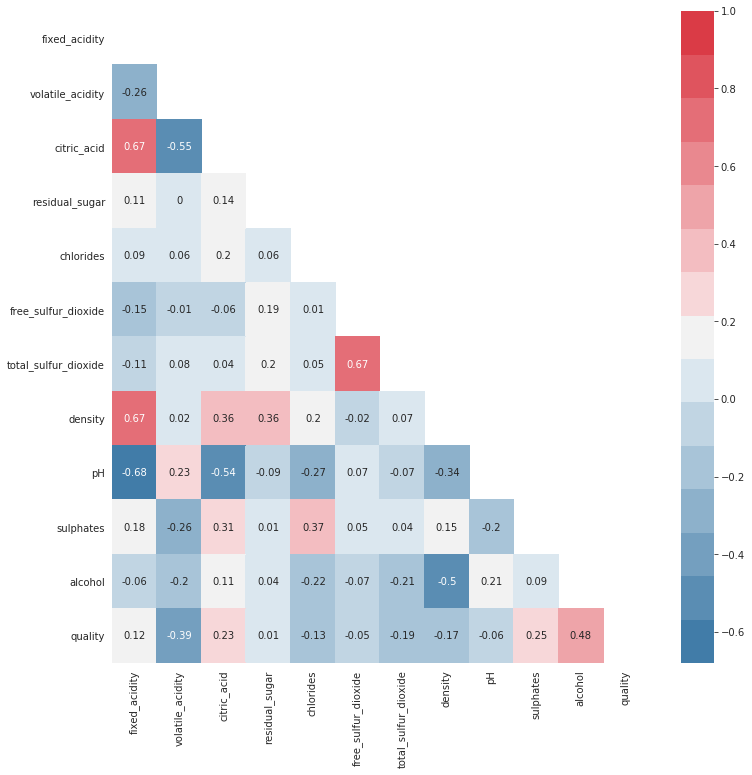

In [7]:
# Correlation Plot
correlation = np.round(wine_data.corr(),2)

# This mask removes repeated values in the correlation matrix
# cutting the chart in half and making it easier to read
dropSelf = np.zeros_like(correlation)
dropSelf[np.triu_indices_from(dropSelf)] = True

plt.figure(figsize=(12,12))
sns.set_style("white")


# Here are 3 different red, white and blue colored heat maps

# Color Map 1 (flat red, white, blue)
#sns.heatmap(data=correlation, annot=True, cmap="coolwarm", mask=dropSelf)

# Color Map 2(bright, red, white, blue)
#sns.heatmap(data=correlation, annot=True, cmap="bwr", mask=dropSelf)

# Color Map 3 (custom palette)
# This uses a diverging palette where custom color values can be used
# note that n = # of different colors in the pallete
sns.heatmap(data=correlation, annot=True, cmap=sns.diverging_palette(240, 10, n=15), mask=dropSelf)

Based on the above correlation matrix, wine quality is correlated midly or moderately with:
* Alcohol Content - 48% or Moderately Positive Correlation
* Sulphates - 25% or Weak Positive Correlation
* Citric Acid - 23% or Weak Positive Correlation
* fixed_acidity - 12% or Weak Postive Correlation

### Because the above four features are the only ones that correlate positively with quality, I will begin my regression anlalysis with ONLY those features

In [8]:
wine_data_small = wine_data[['alcohol', 'sulphates', 
                               'citric_acid', 'fixed_acidity', 
                               'quality']]

print(wine_data_small.shape)

(1599, 5)


### Linear Regression relies on the assumption that all feature (X) variables have a linear relationship with the predictor/label (y)

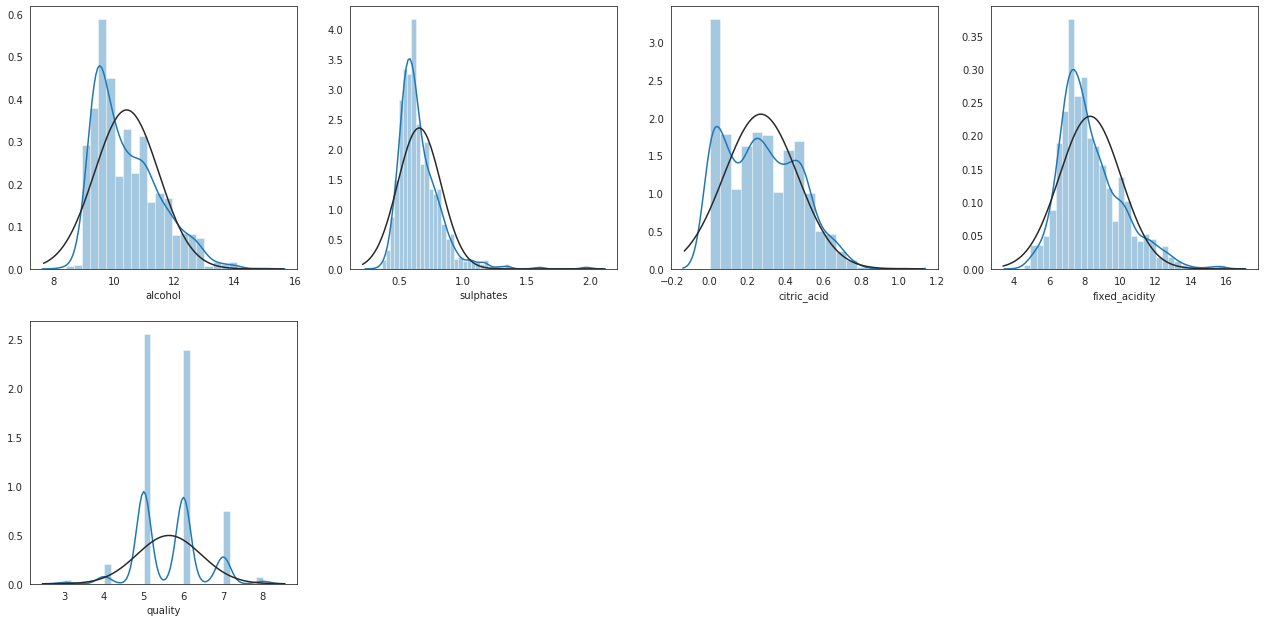

In [9]:
plt.figure(figsize = (22,28))

for i in range(1,6):
    plt.subplot(5,4,i)
    sns.distplot(wine_data_small[wine_data_small.columns[i-1]], fit=scipy.stats.norm)

## Conversion of Target Variable to Binary from Ordinal
The target or label variable is 'quality' which is an ordinal metric with ratings from 1 - 10, where 1 is the lowest quailty and 10 is the highest. Note that these values are integers and therefore have finite possible values. Therefore, Ordinal Logistic Regression could be used here.

By default scikit learns LogisticRegression() function will auto detect for this using the 'multi_class' option upon model intilization.

Below I convert the ordinal values into a binary good/bad category for quality based on pre-set ratings values (bins used)

In [10]:
wine_data[wine_data['quality'] <= 6]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
# Here I create bins in order to separate the data into good or bad
# where quality scores <=6 are 'bad' and scores >=7 are 'good'
bins =  (0,6,10)

y_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins=bins, labels=y_names)

In [12]:
# Next the new y_names need to be encoded for the ML model which means
# convert from text to 0 and 1 values. Scikit comes with a
# LabelEncoder class that can do this. 

encoder = LabelEncoder()

# convert 'bad' to 0 and 'good'  to 1
wine_data['quality'] = encoder.fit_transform(wine_data['quality'])

wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [13]:
wine_data.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Now that the target output column of 'quality' has been converted to binary we can move on to building and testing the model itself

## 5. Build the Model

In [14]:
# Create X and y variables

# All features
X = wine_data.drop('quality', axis=1) 
y = wine_data['quality']

# Only 4 features
#features = ['alcohol','sulphates','citric_acid', 'fixed_acidity']
#target = 'quality'
#X = wine_data_small[features]
#y = wine_data_small[target]

# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Instantiate Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

/home/pbrilliance/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 6. Evaluate Model Accuracy

In [15]:
print(f'Model Accuracy')
print('----------------')
print(f'{metrics.accuracy_score(y_test, y_pred)}')

Model Accuracy
----------------
0.8666666666666667


In [16]:
# Classification Reports can be used with classification models
# in order to show 4 of the more common evaluation models
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.56      0.22      0.32        67

    accuracy                           0.87       480
   macro avg       0.72      0.60      0.62       480
weighted avg       0.84      0.87      0.84       480



In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[401,  12],
       [ 52,  15]])

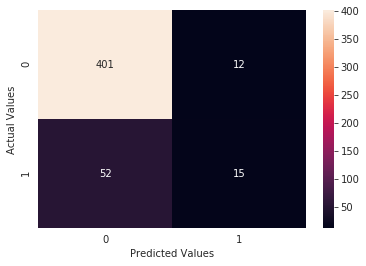

In [18]:
# Confustion Matrix Heat Maxp
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# According to the above confusion matrix, the classifier is terrible at predicting good wines as it is only accurately predicting 22%. However, on the flipside, the model is 97% accurate when predicting bad wines. 